<a href="https://colab.research.google.com/github/kavyajeetbora/ML_algorithms/blob/master/clustering/03_Clustering_Hyperparameter%20Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clustering Methods

There are many types of clustering algorithms.

Many algorithms use similarity or distance measures between examples in the feature space in an effort to discover dense regions of observations. As such, it is often good practice to scale data prior to using clustering algorithms

> *Central to all of the goals of cluster analysis is the notion of the degree of similarity (or dissimilarity) between the individual objects being clustered. A clustering method attempts to group the objects based on the definition of similarity supplied to it.*

Some clustering algorithms require you to specify or guess at the number of clusters to discover in the data, whereas others require the specification of some minimum distance between observations in which examples may be considered “close” or “connected.”


The scikit-learn library provides a suite of different clustering algorithms to choose from.

A list of 10 of the more popular algorithms is as follows:

- Affinity Propagation
- Agglomerative Clustering
- BIRCH
- DBSCAN
- K-Means
- Mini-Batch K-Means
- Mean Shift
- OPTICS
- Spectral Clustering
- Mixture of Gaussians

Each algorithm offers a different approach to the challenge of discovering natural groups in data.

**Note:** There is no best clustering algorithm, and no easy way to find the best algorithm for your data without using controlled experiments.

Here is a comparison on the clustering algorithms:

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png" height=400/>


Read more on the [scikit-learn documentation](https://scikit-learn.org/stable/modules/clustering.html)




## Importing Libraries


In [75]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from matplotlib import pyplot

## Generate synthetic classification dataset

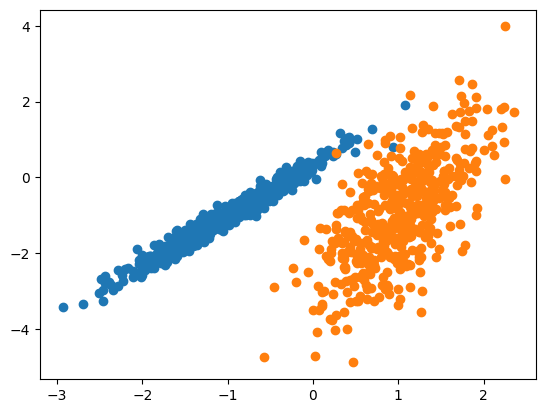

In [67]:
## define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = np.where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

## Hierarical Clustering

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample

Two Ways to Perform Hierarchical Clustering
1. **Agglomerative (Bottom-Up) Approach:**
Start with each data point as a separate cluster.
Iteratively merge the closest clusters until all points are in a single cluster or a stopping criterion is met.
2. **Divisive (Top-Down) Approach:**
Start with all data points in a single cluster.
Iteratively split the clusters into smaller clusters until each data point is in its own cluster or a stopping criterion is met.

### How it Works: Step-by-Step Method with Example

- **Start with each data point as a single cluster**:
  - *Example*: If you have 100 data points, you start with 100 clusters, each containing one data point.

- **Calculate the distance between all pairs of clusters**:
  - *Example*: Compute the distance between each pair of the 100 clusters using a distance metric like Euclidean distance.

- **Merge the closest pair of clusters**:
  - *Example*: Suppose the closest clusters are cluster 1 and cluster 2. Merge them into a single cluster, reducing the total number of clusters to 99.

- **Update the distance matrix**:
  - *Example*: Recalculate the distances between the new cluster (formed by merging cluster 1 and cluster 2) and all other clusters.

- **Repeat steps 3 and 4**:
  - *Example*: Continue merging the closest clusters and updating the distance matrix. After the next merge, you will have 98 clusters, then 97, and so on.

- **Stopping criterion**:
  - *Example*: Stop the process when the distance between the closest clusters exceeds a predefined threshold, or when a desired number of clusters is reached (e.g., stop when you have 5 clusters).

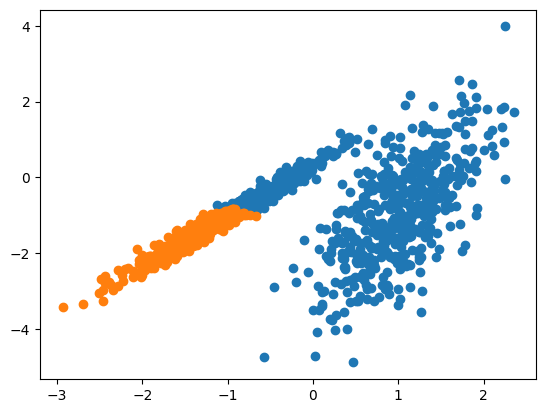

In [68]:
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

## DBSCAN

Density Based Spatial Clustering of Applications with Noise involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

Hyperparameters:

- `eps`
- `minPts`

When to use?

1. Use DBSCAN: When you have clusters of arbitrary shapes, need to handle noise and outliers, and do not want to specify the number of clusters in advance.
2. Use K-means: When you have large datasets with roughly spherical clusters and need a fast, efficient algorithm.
3. Use Agglomerative Clustering: When you need a hierarchical structure, have small to medium datasets, and want to visualize the clustering process with a dendrogram.

How it works:

[StatQuest: Clustering with DBSCAN, Clearly Explained!!!](https://youtu.be/RDZUdRSDOok?si=wXHR76WqCOUZ-RLw)

**How DBSCAN Works: Step-by-Step Method**

1. Select Parameters:

    - ε (epsilon): The maximum distance between two points for them to be considered neighbors.
    - MinPts: The minimum number of points required to form a dense region (a cluster).
Classify Points:

2. Core Points: Points that have at least MinPts neighbors within a distance of ε.
3. Border Points: Points that are within the ε distance of a core point but do not have enough neighbors to be a core point themselves.
4. Noise Points: Points that are neither core points nor border points.

5. Form Clusters:

    - Start with an unvisited point and check if it is a core point.
    - If it is a core point, create a new cluster and recursively add all its density-reachable points (points within ε distance).
    - If it is not a core point, mark it as noise (later it might be found to be a border point).
6. Expand Clusters:

    - Continue the process for all unvisited points, expanding clusters by adding density-reachable points until all points are visited.

**Example**
Let's say we have a dataset with points scattered in a 2D space. We set ε = 0.5 and MinPts = 5.


1. Select Parameters:

    - ε = 0.5
    - MinPts = 5

2. Classify Points:

    - Identify core points, border points, and noise points based on the parameters.

4. Form Clusters:

    - Start with an unvisited core point, create a cluster, and add all density-reachable points.
5. Expand Clusters:

    - Continue until all points are visited and clusters are formed.

In [69]:
model = DBSCAN(eps=0.30, min_samples=9)
y_hat = model.fit_predict(X)

In [70]:
clusters = np.unique(y_hat)

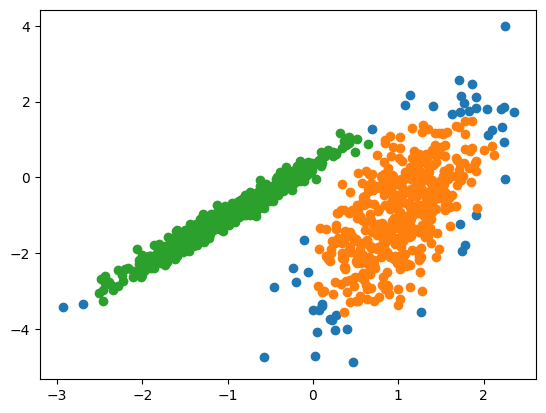

In [74]:
for cluster in clusters:
    row_ids = np.where(y_hat==cluster)
    pyplot.scatter(X[row_ids,0], X[row_ids,1])

pyplot.show()

## K Means

We have covered this in detail in the previous notebook so not covering here

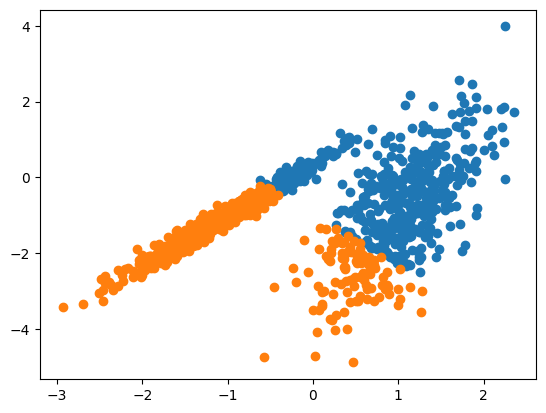

In [79]:
model = KMeans(n_clusters=2)
y_hat = model.fit_predict(X)

clusters = np.unique(y_hat)

for cluster in clusters:

    row_ids = np.where(y_hat == cluster)
    pyplot.scatter(X[row_ids, 0], X[row_ids,1])

pyplot.show();